<a href="https://colab.research.google.com/github/Weedi2002/AI-ML-Internship-Tasks/blob/main/Intern_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# -------------------------------
TASK 2: Predict Stock Prices (Apple)

Using Linear Regression

Author: Waleed Ur Rehman Azam

Internship: AI/ML Engineering (Remote)

Date: 14 November 2025
# -------------------------------

In [ ]:
# Install yfinance (used to download stock data)
!pip install yfinance

In [ ]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# -------------------------------
# STEP 1: Load Stock Market Data
# Choose any stock:
# AAPL → Apple
# TSLA → Tesla
# MSFT → Microsoft
# META → Meta
# -------------------------------

# Choose a stock symbol
stock = "AAPL"   # I am choosing Apple.

# Download historical stock data from Yahoo Finance
# Data includes: Open, High, Low, Close, Volume, Adjusted Close
data = yf.download(stock, start="2015-01-01", end="2024-12-31") #2015-2024

# Show first few rows to understand structure
data.head()

/tmp/ipython-input-3696942532.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2015-01-01", end="2024-12-31") #2015-2024
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237549,24.705318,23.798599,24.694233,212818400
2015-01-05,23.554741,24.086801,23.368521,24.006992,257142000
2015-01-06,23.556955,23.816334,23.195597,23.619029,263188400
2015-01-07,23.887280,23.987040,23.654503,23.765348,160423600
2015-01-08,24.805079,24.862719,24.097882,24.215380,237458000


In [ ]:
# -------------------------------
# STEP 2: Explore the Dataset
# -------------------------------

print("Dataset Shape:", data.shape)     # number of rows and columns
print("\n--- Dataset Info ---")
print(data.info())                      # datatypes + null values

print("\n--- Summary Statistics ---")
data.describe()                          # mean, std, min, max, etc.

Dataset Shape: (2515, 5)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2515 non-null   float64
 1   (High, AAPL)    2515 non-null   float64
 2   (Low, AAPL)     2515 non-null   float64
 3   (Open, AAPL)    2515 non-null   float64
 4   (Volume, AAPL)  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB
None

--- Summary Statistics ---


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,93.797132,94.707869,92.783453,93.709472,1.171162e+08
std,65.380823,65.973200,64.693209,65.298503,6.839222e+07
min,20.604073,20.907414,20.405651,20.526533,2.323470e+07
25%,35.203341,35.606976,34.844186,35.234239,7.108655e+07
50%,64.373764,64.723186,63.565049,64.132049,1.003845e+08
75%,150.219719,151.947363,148.203868,150.002031,1.426222e+08
max,257.853760,258.928914,256.470034,257.027510,6.488252e+08


In [ ]:
# -------------------------------
# STEP 3: Create Target Variable
# -------------------------------

# We shift the Close price upward by 1 row so it becomes "Next Day Close"
data["Next_Close"] = data["Close"].shift(-1)

# Remove last row (because Next_Close becomes NaN)
data = data.dropna()

# Display updated dataset
data.head()

Price,Close,High,Low,Open,Volume,Next_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2015-01-02,24.237549,24.705318,23.798599,24.694233,212818400,23.554741
2015-01-05,23.554741,24.086801,23.368521,24.006992,257142000,23.556955
2015-01-06,23.556955,23.816334,23.195597,23.619029,263188400,23.887280
2015-01-07,23.887280,23.987040,23.654503,23.765348,160423600,24.805079
2015-01-08,24.805079,24.862719,24.097882,24.215380,237458000,24.831684


In [ ]:
# -------------------------------
# STEP 4: Select Features & Target
# -------------------------------

# Features we will use to predict next-day closing price
features = ["Open", "High", "Low", "Close", "Volume"]

# X = input features, y = output/target (next day close)
X = data[features]
y = data["Next_Close"]

In [ ]:
# -------------------------------
# STEP 5: Train-Test Split
# -------------------------------

# Split dataset (80% training, 20% testing)
# shuffle=False because time-series data should not be mixed randomly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Print shapes to confirm correct split
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (2011, 5)
Testing Data Shape: (503, 5)


In [ ]:
# -------------------------------
# STEP 6: Train Linear Regression Model
# -------------------------------

model = LinearRegression()

# Fit model on training data
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Show first 10 predictions for understanding
predictions[:10]

array([124.44209697, 127.99074163, 127.69843634, 122.76043636,
       124.65035694, 123.31469216, 127.36158127, 129.26348025,
       128.15196544, 131.24211787])

In [ ]:
# -------------------------------
# STEP 7: Evaluate the Model
# -------------------------------

# Mean Squared Error (lower = better)
mse = mean_squared_error(y_test, predictions)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 6.637368847667595


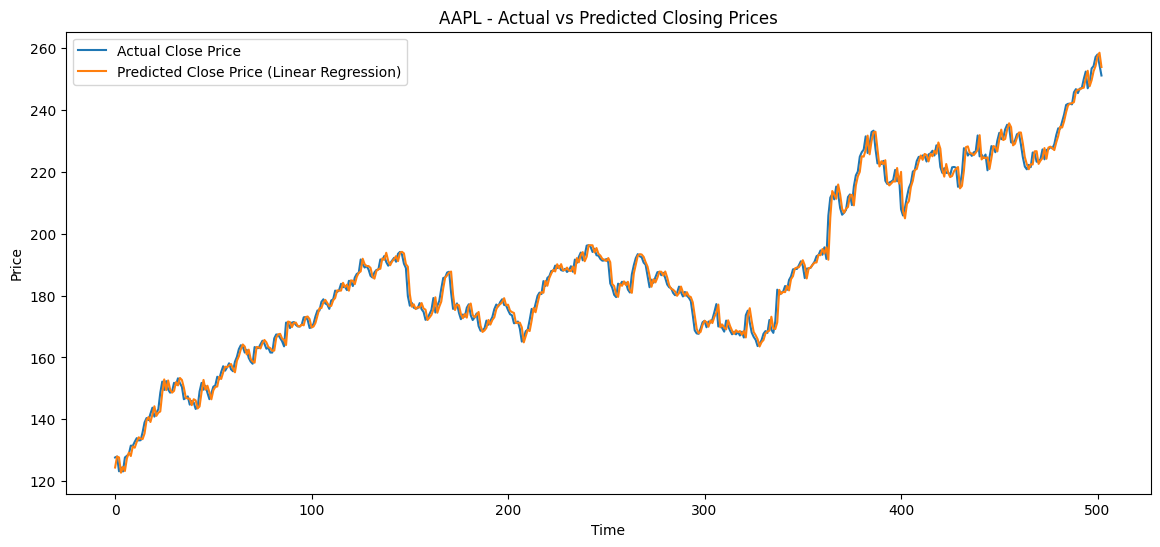

In [ ]:
# -------------------------------
# STEP 8: Visualization
# Actual vs Predicted Closing Price
# -------------------------------

plt.figure(figsize=(14,6))

# Actual closing prices
plt.plot(y_test.values, label="Actual Close Price")

# Predicted closing prices
plt.plot(predictions, label="Predicted Close Price (Linear Regression)")

plt.title(f"{stock} - Actual vs Predicted Closing Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()